<a href="https://colab.research.google.com/github/vennelanayini/Feed-Forward-Neural-Networks/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

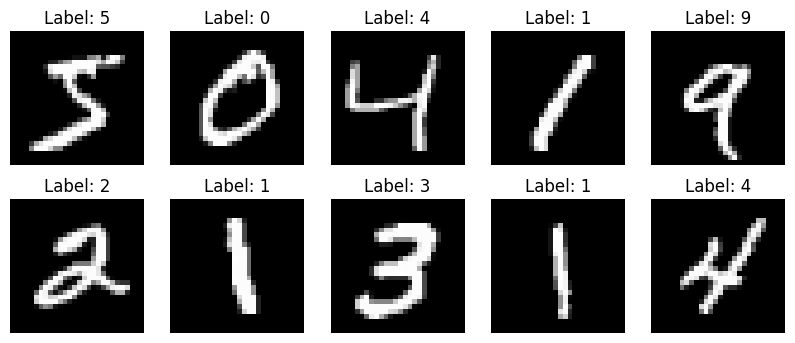

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_16                 │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_17                 │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.7980 - loss: 0.7327 - val_accuracy: 0.9456 - val_loss: 0.1813
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.9486 - loss: 0.1692 - val_accuracy: 0.9686 - val_loss: 0.1115
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.9678 - loss: 0.1041 - val_accuracy: 0.9753 - val_loss: 0.0830
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.9775 - loss: 0.0750 - val_accuracy: 0.9763 - val_loss: 0.0794
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - accuracy: 0.9803 - loss: 0.0640 - val_accuracy: 0.9796 - val_loss: 0.0656
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.9860 - loss: 0.0451 - val_accuracy: 0.9800 - val_loss: 0.0634
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.9891 - loss: 0.0365 - val_accuracy: 0.9821 - val_loss: 0.0620
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.9902 - loss: 0.0316 - 

In [ ]:
import keras
import keras.utils
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Activation
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
plt.figure(figsize=(10, 4))  # Set The size Of The Figure
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Make subplots for 10 images
    plt.imshow(x_train[i], cmap='gray')  # Display The grayscale images
    plt.title(f"Label: {y_train[i]}")  # Add labels
    plt.axis('off')  # Axis Labels Turned Off
plt.show()  # Displaying the plot
# Consider The First 50000 samples As The Training Dataset
x_train_main = x_train[:50000]
y_train_main = y_train[:50000]
# Conside The Last 10000 Samples AS The Validation Dataset
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train_main = x_train_main / 255.0
x_val=x_val/255.0
x_test = x_test / 255.0
x_train_main = x_train_main.reshape(50000, 28, 28, 1)
x_val = x_val.reshape(10000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
y_train_main = keras.utils.to_categorical(y_train_main, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)
#Create An Instance of Sequential Class.
LeNet5_Model=Sequential()
# Add First Convolutional Layer
LeNet5_Model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)))
# Add First Average Pooling Layer
LeNet5_Model.add(AveragePooling2D((2, 2)))
# Add Second Convolutional Layer
LeNet5_Model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
# Add Second Average Pooling Layer
LeNet5_Model.add(AveragePooling2D((2, 2)))
# Flatten The Layer
LeNet5_Model.add(Flatten())
# Add Dense Layer
LeNet5_Model.add(Dense(120, activation='tanh'))
LeNet5_Model.add(Dense(84, activation='tanh'))
LeNet5_Model.add(Dense(10, activation='softmax'))
LeNet5_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
LeNet5_Model.summary()
LeNet5_Model.fit(x_train_main, y_train_main, epochs=10, batch_size=128, validation_data=(x_val, y_val))
test_loss, test_acc = LeNet5_Model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

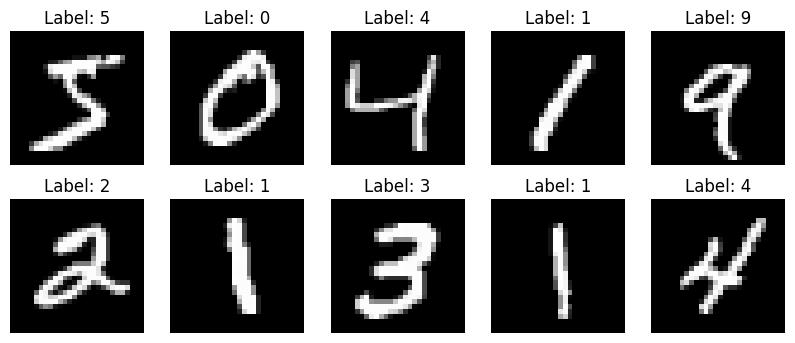

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_10                 │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_11                 │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,726 (174.71 KB)

 Trainable params: 44,726 (174.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8175 - loss: 0.6492 - val_accuracy: 0.9631 - val_loss: 0.1335
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9642 - loss: 0.1194 - val_accuracy: 0.9755 - val_loss: 0.0855
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9776 - loss: 0.0742 - val_accuracy: 0.9787 - val_loss: 0.0734
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9842 - loss: 0.0529 - val_accuracy: 0.9830 - val_loss: 0.0573
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9858 - loss: 0.0464 - val_accuracy: 0.9847 - val_loss: 0.0501
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9814 - loss: 0.0530
Test accuracy: 0.9850999712944031


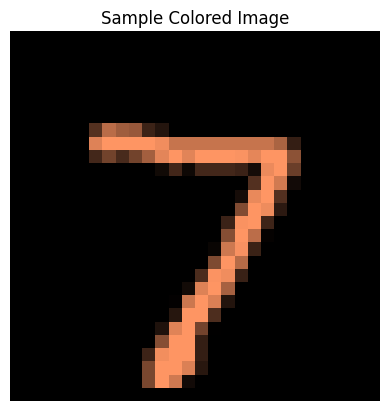

In [ ]:
import keras
import keras.utils
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation
import matplotlib.pyplot as plt
import numpy as np
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
# Convert grayscale images to 3-channel format by stacking
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)
# Display some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])  # Display RGB format
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()
# Split into training and validation sets
x_train_main = x_train[:50000] / 255.0
x_val = x_train[50000:] / 255.0
x_test = x_test / 255.0
y_train_main = keras.utils.to_categorical(y_train[:50000], 10)
y_val = keras.utils.to_categorical(y_train[50000:], 10)
y_test = keras.utils.to_categorical(y_test, 10)
# Reshape for 3-channel input
x_train_main = x_train_main.reshape(50000, 28, 28, 3)
x_val = x_val.reshape(10000, 28, 28, 3)
x_test = x_test.reshape(10000, 28, 28, 3)
# Create LeNet-5 Model with 3 channels
LeNet5_Model = Sequential()
LeNet5_Model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 3)))
LeNet5_Model.add(AveragePooling2D((2, 2)))
LeNet5_Model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
LeNet5_Model.add(AveragePooling2D((2, 2)))
LeNet5_Model.add(Flatten())
LeNet5_Model.add(Dense(120, activation='tanh'))
LeNet5_Model.add(Dense(84, activation='tanh'))
LeNet5_Model.add(Dense(10, activation='softmax'))
# Compile the model
LeNet5_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Model Summary
LeNet5_Model.summary()
# Train the model
LeNet5_Model.fit(x_train_main, y_train_main, epochs=5, batch_size=128, validation_data=(x_val, y_val))
test_loss, test_acc = LeNet5_Model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Example for recognizing a colored image
# Create a sample colored image by modifying channels individually
# Create a sample colored image by modifying channels individually
import cv2
colored_image = x_test[0].copy()  # Copy the original image
colored_image[:, :, 0] *= 255  # Boost Red channel
colored_image[:, :, 1] *= 150  # Boost Green channel
colored_image[:, :, 2] *= 100  # Boost Blue channel

# Display the modified image
plt.imshow(colored_image.astype('uint8'))
plt.title("Sample Colored Image")
plt.axis('off')
plt.show()




Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8080 - loss: 0.6794 - val_accuracy: 0.9542 - val_loss: 0.1520
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9570 - loss: 0.1422 - val_accuracy: 0.9756 - val_loss: 0.0889
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9756 - loss: 0.0804 - val_accuracy: 0.9783 - val_loss: 0.0703
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9826 - loss: 0.0586 - val_accuracy: 0.9812 - val_loss: 0.0649
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9842 - loss: 0.0515 - val_accuracy: 0.9830 - val_loss: 0.0603
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9797 - loss: 0.0591
Test accuracy: 0.9835000038146973
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


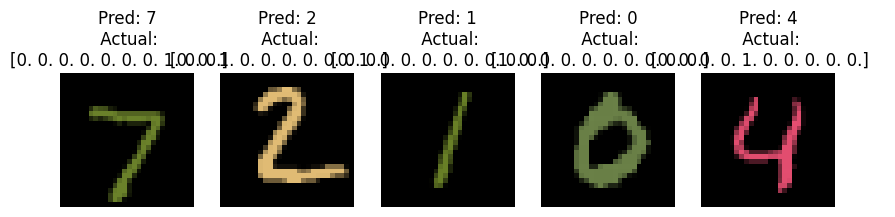

In [ ]:
import keras
import keras.utils
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation
import matplotlib.pyplot as plt
import numpy as np
import cv2
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
# Convert grayscale images to 3-channel format by stacking
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)
# Split into training and validation sets
x_train_main = x_train[:50000] / 255.0
x_val = x_train[50000:] / 255.0
x_test = x_test / 255.0
y_train_main = keras.utils.to_categorical(y_train[:50000], 10)
y_val = keras.utils.to_categorical(y_train[50000:], 10)
y_test = keras.utils.to_categorical(y_test, 10)
# Reshape for 3-channel input
x_train_main = x_train_main.reshape(50000, 28, 28, 3)
x_val = x_val.reshape(10000, 28, 28, 3)
x_test = x_test.reshape(10000, 28, 28, 3)
# Create LeNet-5 Model with 3 channels
LeNet5_Model = Sequential()
LeNet5_Model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 3)))
LeNet5_Model.add(AveragePooling2D((2, 2)))
LeNet5_Model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
LeNet5_Model.add(AveragePooling2D((2, 2)))
LeNet5_Model.add(Flatten())
LeNet5_Model.add(Dense(120, activation='tanh'))
LeNet5_Model.add(Dense(84, activation='tanh'))
LeNet5_Model.add(Dense(10, activation='softmax'))
# Compile the model
LeNet5_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
LeNet5_Model.fit(x_train_main, y_train_main, epochs=5, batch_size=128, validation_data=(x_val, y_val))
test_loss, test_acc = LeNet5_Model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Display multiple sample colored digits with predictions
plt.figure(figsize=(10, 6))
for i in range(5):
    colored_image = x_test[i].copy()
    colored_image[:, :, 0] *= np.random.randint(100, 255)  # Random Red Channel
    colored_image[:, :, 1] *= np.random.randint(50, 200)   # Random Green Channel
    colored_image[:, :, 2] *= np.random.randint(30, 180)   # Random Blue Channel
    # Predict the digit
    prediction = LeNet5_Model.predict(colored_image.reshape(1, 28, 28, 3)).argmax()
    plt.subplot(1, 5, i + 1)
    plt.imshow(colored_image.astype('uint8'))
    plt.title(f"Pred: {prediction}\n Actual:\n{y_test[i]}   ")
    plt.axis('off')
plt.show()


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8035 - loss: 0.6830 - val_accuracy: 0.9599 - val_loss: 0.1393
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9630 - loss: 0.1240 - val_accuracy: 0.9750 - val_loss: 0.0821
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9779 - loss: 0.0721 - val_accuracy: 0.9798 - val_loss: 0.0684
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9828 - loss: 0.0545 - val_accuracy: 0.9817 - val_loss: 0.0614
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9873 - loss: 0.0423 - val_accuracy: 0.9849 - val_loss: 0.0529
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9848 - loss: 0.0495
Test accuracy: 0.9873999953269958
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


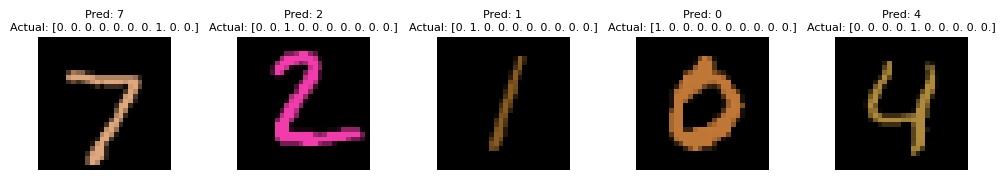

In [ ]:
import keras
import keras.utils
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation
import matplotlib.pyplot as plt
import numpy as np
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
# Convert grayscale images to 3-channel format by stacking
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)
# Split into training and validation sets
x_train_main = x_train[:50000] / 255.0
x_val = x_train[50000:] / 255.0
x_test = x_test / 255.0
y_train_main = keras.utils.to_categorical(y_train[:50000], 10)
y_val = keras.utils.to_categorical(y_train[50000:], 10)
y_test = keras.utils.to_categorical(y_test, 10)
# Reshape for 3-channel input
x_train_main = x_train_main.reshape(50000, 28, 28, 3)
x_val = x_val.reshape(10000, 28, 28, 3)
x_test = x_test.reshape(10000, 28, 28, 3)
# Create LeNet-5 Model with 3 channels
LeNet5_Model = Sequential()
LeNet5_Model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 3)))
LeNet5_Model.add(AveragePooling2D((2, 2)))
LeNet5_Model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
LeNet5_Model.add(AveragePooling2D((2, 2)))
LeNet5_Model.add(Flatten())
LeNet5_Model.add(Dense(120, activation='tanh'))
LeNet5_Model.add(Dense(84, activation='tanh'))
LeNet5_Model.add(Dense(10, activation='softmax'))
# Compile the model
LeNet5_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
LeNet5_Model.fit(x_train_main, y_train_main, epochs=5, batch_size=128, validation_data=(x_val, y_val))# Train the model
test_loss, test_acc = LeNet5_Model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Display multiple sample colored digits with predictions
plt.figure(figsize=(12, 6))
for i in range(5):
    colored_image = x_test[i].copy()
    colored_image[:, :, 0] *= np.random.randint(100, 255)  # Random Red Channel
    colored_image[:, :, 1] *= np.random.randint(20, 200)   # Random Green Channel
    colored_image[:, :, 2] *= np.random.randint(30, 180)   # Random Blue Channel
    # Predict the digit
    prediction = LeNet5_Model.predict(colored_image.reshape(1, 28, 28, 3)).argmax()
    plt.subplot(1, 5, i + 1)
    plt.imshow(colored_image.astype('uint8'))
    plt.title(f"Pred: {prediction}\nActual: {y_test[i]}", fontsize=8)
    plt.axis('off')
    plt.subplots_adjust(wspace=0.5)  # Add spacing between images to prevent overlap
plt.show()

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8170 - loss: 0.6362 - val_accuracy: 0.9600 - val_loss: 0.1411
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9629 - loss: 0.1249 - val_accuracy: 0.9742 - val_loss: 0.0903
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9761 - loss: 0.0799 - val_accuracy: 0.9816 - val_loss: 0.0628
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9822 - loss: 0.0576 - val_accuracy: 0.9820 - val_loss: 0.0601
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9859 - loss: 0.0463 - val_accuracy: 0.9830 - val_loss: 0.0570
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9813 - loss: 0.0550
Test accuracy: 0.9843000173568726
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


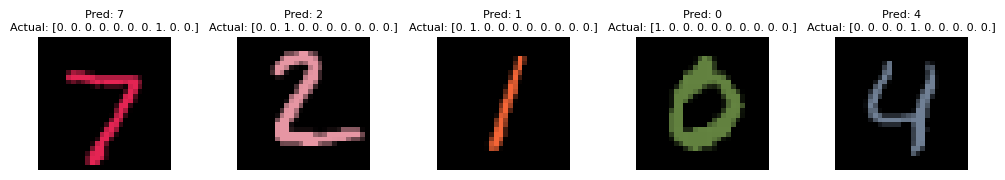

In [ ]:
import keras
import keras.utils
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()# Load MNIST Dataset
x_train = np.stack((x_train,)*3, axis=-1)# Convert grayscale images to 3-channel format by stacking
x_test = np.stack((x_test,)*3, axis=-1)
x_train_main = x_train[:50000] / 255.0# Split into training and validation sets
x_val = x_train[50000:] / 255.0
x_test = x_test / 255.0
y_train_main = keras.utils.to_categorical(y_train[:50000], 10)
y_val = keras.utils.to_categorical(y_train[50000:], 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train_main = x_train_main.reshape(50000, 28, 28, 3)# Reshape for 3-channel input
x_val = x_val.reshape(10000, 28, 28, 3)
x_test = x_test.reshape(10000, 28, 28, 3)
LeNet5_Model = Sequential()
LeNet5_Model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 3)))# Create LeNet-5 Model with 3 channels
LeNet5_Model.add(AveragePooling2D((2, 2)))
LeNet5_Model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
LeNet5_Model.add(AveragePooling2D((2, 2)))
LeNet5_Model.add(Flatten())
LeNet5_Model.add(Dense(120, activation='tanh'))
LeNet5_Model.add(Dense(84, activation='tanh'))
LeNet5_Model.add(Dense(10, activation='softmax'))
LeNet5_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Compile the model
LeNet5_Model.fit(x_train_main, y_train_main, epochs=5, batch_size=128, validation_data=(x_val, y_val))# Train the model
test_loss, test_acc = LeNet5_Model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)# Display multiple sample colored digits with predictions
plt.figure(figsize=(12, 6))
for i in range(5):
    colored_image = x_test[i].copy()
    colored_image[:, :, 0] *= np.random.randint(100, 255)  # Random Red Channel
    colored_image[:, :, 1] *= np.random.randint(20, 200)   # Random Green Channel
    colored_image[:, :, 2] *= np.random.randint(30, 180)   # Random Blue Channel
    prediction = LeNet5_Model.predict(colored_image.reshape(1, 28, 28, 3)).argmax()# Predict the digit
    plt.subplot(1, 5, i + 1)
    plt.imshow(colored_image.astype('uint8'))
    plt.title(f"Pred: {prediction}\nActual: {y_test[i]}", fontsize=8)
    plt.axis('off')
    plt.subplots_adjust(wspace=0.5)  # Add spacing between images to prevent overlap
plt.show()

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8181 - loss: 0.6331 - val_accuracy: 0.9567 - val_loss: 0.1426
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9651 - loss: 0.1165 - val_accuracy: 0.9759 - val_loss: 0.0803
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9781 - loss: 0.0713 - val_accuracy: 0.9797 - val_loss: 0.0666
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9832 - loss: 0.0547 - val_accuracy: 0.9814 - val_loss: 0.0627
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9869 - loss: 0.0432 - val_accuracy: 0.9813 - val_loss: 0.0592
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.0574
Test accuracy: 0.9840999841690063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

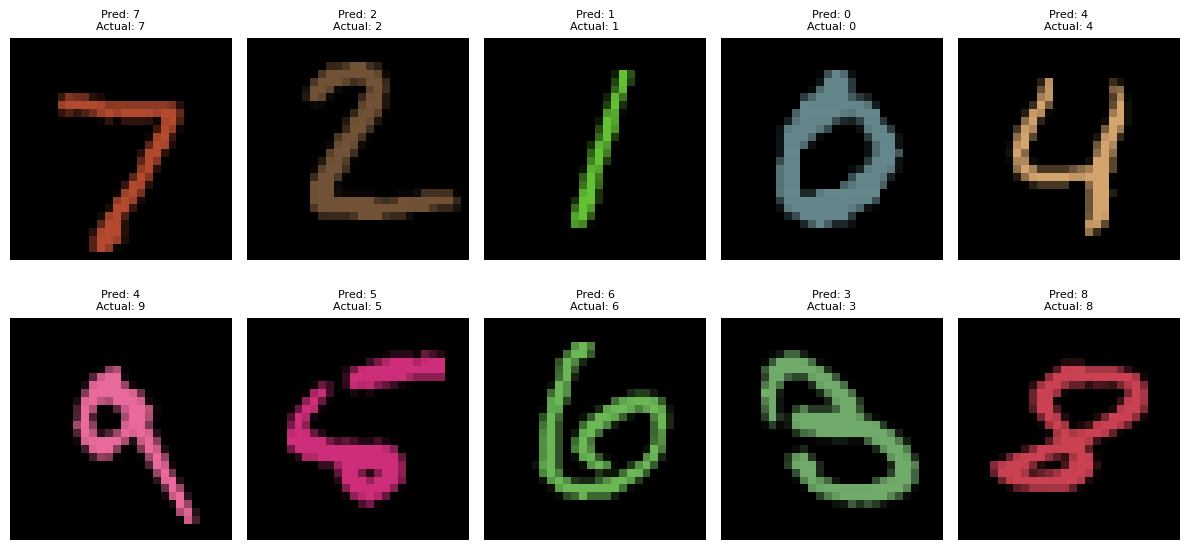

In [ ]:
import keras
import keras.utils
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation
import matplotlib.pyplot as plt
import numpy as np
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
# Convert grayscale images to 3-channel format by stacking
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)
# Split into training and validation sets
x_train_main = x_train[:50000] / 255.0
x_val = x_train[50000:] / 255.0
x_test = x_test / 255.0
y_train_main = keras.utils.to_categorical(y_train[:50000], 10)
y_val = keras.utils.to_categorical(y_train[50000:], 10)
y_test = keras.utils.to_categorical(y_test, 10)
# Reshape for 3-channel input
x_train_main = x_train_main.reshape(50000, 28, 28, 3)
x_val = x_val.reshape(10000, 28, 28, 3)
x_test = x_test.reshape(10000, 28, 28, 3)
# Create LeNet-5 Model with 3 channels
LeNet5_Model = Sequential()
LeNet5_Model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 3)))
LeNet5_Model.add(AveragePooling2D((2, 2)))
LeNet5_Model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
LeNet5_Model.add(AveragePooling2D((2, 2)))
LeNet5_Model.add(Flatten())
LeNet5_Model.add(Dense(120, activation='tanh'))
LeNet5_Model.add(Dense(84, activation='tanh'))
LeNet5_Model.add(Dense(10, activation='softmax'))
# Compile the model
LeNet5_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
LeNet5_Model.fit(x_train_main, y_train_main, epochs=5, batch_size=128, validation_data=(x_val, y_val))
test_loss, test_acc = LeNet5_Model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Display colored digits 0-9 with predictions
plt.figure(figsize=(12, 6))
displayed_digits = set()
count = 0
for i in range(len(x_test)):
    digit_label = y_test[i].argmax()
    if digit_label not in displayed_digits:
        colored_image = x_test[i].copy()
        colored_image[:, :, 0] *= np.random.randint(100, 255)  # Random Red Channel
        colored_image[:, :, 1] *= np.random.randint(20, 200)   # Random Green Channel
        colored_image[:, :, 2] *= np.random.randint(30, 180)   # Random Blue Channel
        prediction = LeNet5_Model.predict(colored_image.reshape(1, 28, 28, 3)).argmax()
        plt.subplot(2, 5, count + 1)
        plt.imshow(colored_image.astype('uint8'))
        plt.title(f"Pred: {prediction}\nActual: {digit_label}", fontsize=8)
        plt.axis('off')
        displayed_digits.add(digit_label)
        count += 1
    if count == 10:
        break
plt.tight_layout()
plt.show()
